<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/Forcasting/Forcating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Airlines Data and Cococola Data in this file only...


# Airlines Data

In [ ]:
Air=pd.read_excel("Airlines+Data.xlsx")
Air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
Air.info

<bound method DataFrame.info of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [ ]:
Air.describe

<bound method NDFrame.describe of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

<Axes: >

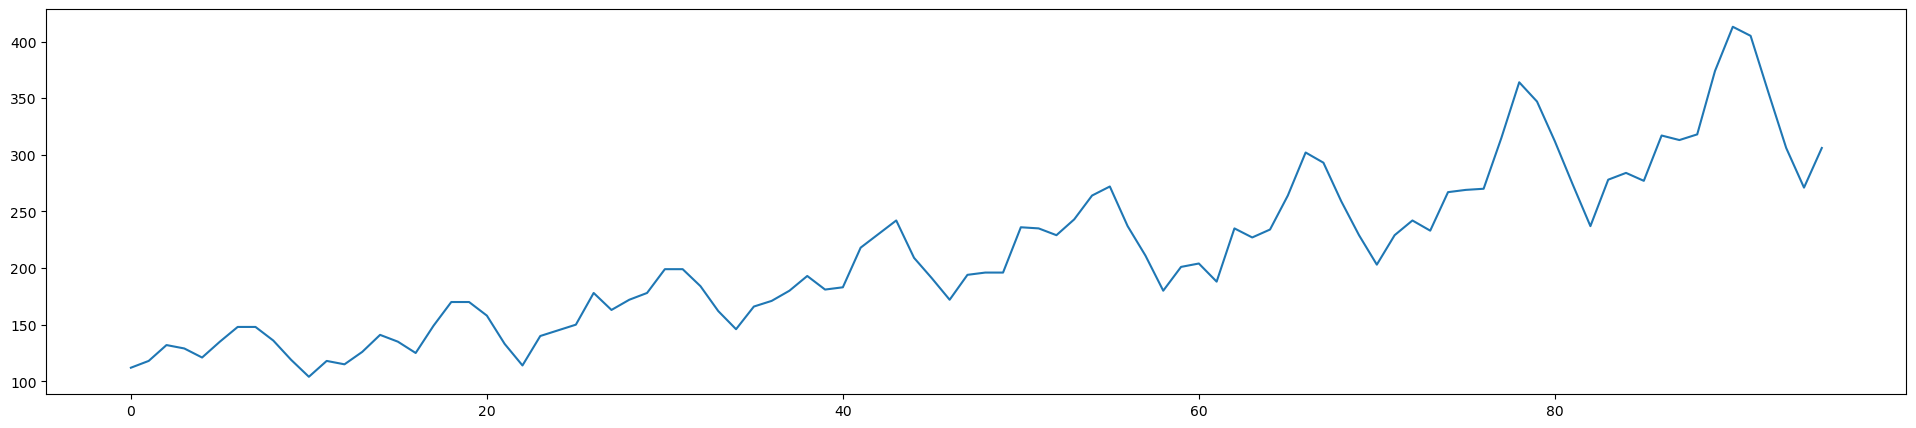

In [ ]:
#Visualization
plt.figure(figsize=(24,5))
Air.Passengers.plot()

it has vary high fluation in data.

In [ ]:
Air["Date"] = pd.to_datetime(Air.Month,format="%b-%y")

In [ ]:
Air["month"] = Air.Date.dt.strftime("%b") # month extraction
Air["year"] = Air.Date.dt.strftime("%y") # year extraction

In [ ]:
#Day extraction
Air["Day"] = Air.Date.dt.strftime("%d")
#weekday extraction
Air["wkday"] = Air.Date.dt.strftime("%A")
Air

,Month,Passengers,Date,month,year,Day,wkday
0,1995-01-01,112,1995-01-01,Jan,95,01,Sunday
1,1995-02-01,118,1995-02-01,Feb,95,01,Wednesday
2,1995-03-01,132,1995-03-01,Mar,95,01,Wednesday
3,1995-04-01,129,1995-04-01,Apr,95,01,Saturday
4,1995-05-01,121,1995-05-01,May,95,01,Monday
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02,01,Thursday
92,2002-09-01,355,2002-09-01,Sep,02,01,Sunday
93,2002-10-01,306,2002-10-01,Oct,02,01,Tuesday
94,2002-11-01,271,2002-11-01,Nov,02,01,Friday


<Axes: xlabel='month', ylabel='year'>

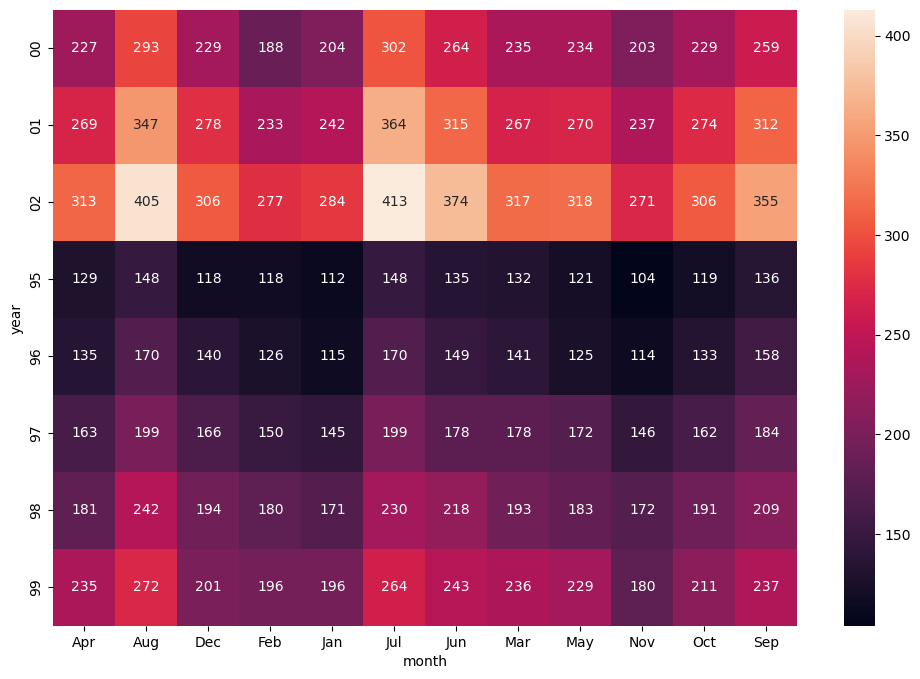

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='year', ylabel='Passengers'>

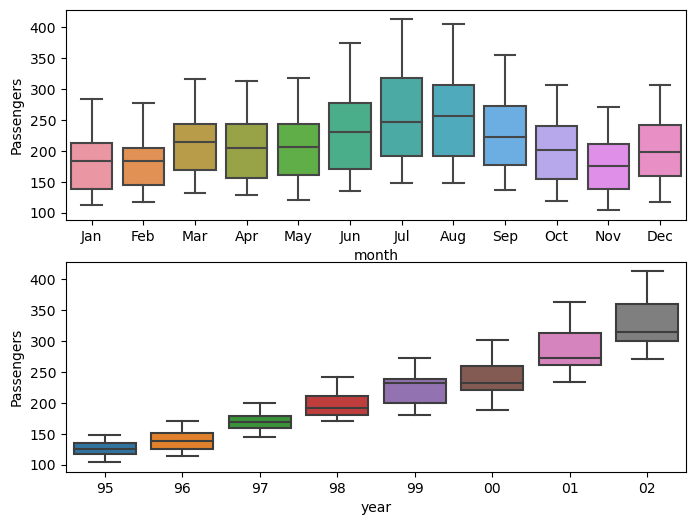

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)

C:\Users\anura\AppData\Local\Temp\ipykernel_9536\3979875208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air['month'][i]= A[0:3]
C:\Users\anura\AppData\Local\Temp\ipykernel_9536\3979875208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air['month'][i]= A[0:3]
C:\Users\anura\AppData\Local\Temp\ipykernel_9536\3979875208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air['month'][i]= A[0:3]
C:\Users\anura\AppData\Local\Te

<Axes: >

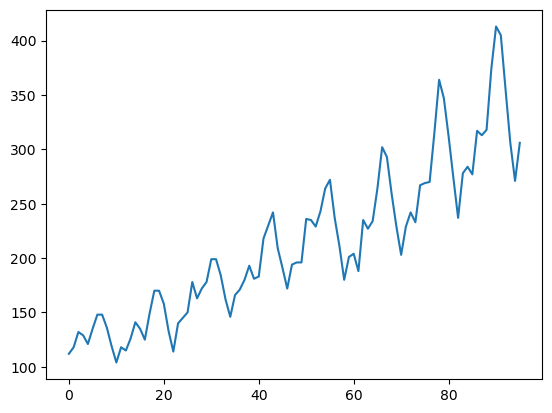

In [ ]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#import numpy as np
A = Air["month"][0]
A[0:3]
Air['Month']= 0

for i in range(96):
    A = Air["month"][i]
    Air['month'][i]= A[0:3]

month_dummies = pd.DataFrame(pd.get_dummies(Air['month']))
Air1 = pd.concat([Air.Passengers,month_dummies],axis = 1)

Air1["t"] = np.arange(1,97)

Air1["t_square"] = Air1["t"]*Air1["t"]
Air1.columns
Air1["log_Passengers"] = np.log(Air1["Passengers"])
Air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
Air1.Passengers.plot()

In [ ]:
Air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,118,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,132,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,129,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,121,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,False,True,False,False,False,False,False,False,False,False,False,False,92,8464,6.003887
92,355,False,False,False,False,False,False,False,False,False,False,False,True,93,8649,5.872118
93,306,False,False,False,False,False,False,False,False,False,False,True,False,94,8836,5.723585
94,271,False,False,False,False,False,False,False,False,False,True,False,False,95,9025,5.602119


In [ ]:
#Splitting data
Train = Air1.head(72)
Test = Air1.iloc[72:84,:]
predict_data = Air1.tail(12)
Air2= Air1.iloc[0:84,:]

In [ ]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,118,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,132,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,129,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,121,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,293,False,True,False,False,False,False,False,False,False,False,False,False,68,4624,5.680173
68,259,False,False,False,False,False,False,False,False,False,False,False,True,69,4761,5.556828
69,229,False,False,False,False,False,False,False,False,False,False,True,False,70,4900,5.433722
70,203,False,False,False,False,False,False,False,False,False,True,False,False,71,5041,5.313206


In [ ]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
72,242,False,False,False,False,True,False,False,False,False,False,False,False,73,5329,5.488938
73,233,False,False,False,True,False,False,False,False,False,False,False,False,74,5476,5.451038
74,267,False,False,False,False,False,False,False,True,False,False,False,False,75,5625,5.587249
75,269,True,False,False,False,False,False,False,False,False,False,False,False,76,5776,5.594711
76,270,False,False,False,False,False,False,False,False,True,False,False,False,77,5929,5.598422
77,315,False,False,False,False,False,False,True,False,False,False,False,False,78,6084,5.752573
78,364,False,False,False,False,False,True,False,False,False,False,False,False,79,6241,5.897154
79,347,False,True,False,False,False,False,False,False,False,False,False,False,80,6400,5.849325
80,312,False,False,False,False,False,False,False,False,False,False,False,True,81,6561,5.743003
81,274,False,False,False,False,False,False,False,False,False,False,True,False,82,6724,5.613128


In [ ]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,False,False,False,False,True,False,False,False,False,False,False,False,85,7225,5.648974
85,277,False,False,False,True,False,False,False,False,False,False,False,False,86,7396,5.624018
86,317,False,False,False,False,False,False,False,True,False,False,False,False,87,7569,5.758902
87,313,True,False,False,False,False,False,False,False,False,False,False,False,88,7744,5.746203
88,318,False,False,False,False,False,False,False,False,True,False,False,False,89,7921,5.762051
89,374,False,False,False,False,False,False,True,False,False,False,False,False,90,8100,5.924256
90,413,False,False,False,False,False,True,False,False,False,False,False,False,91,8281,6.023448
91,405,False,True,False,False,False,False,False,False,False,False,False,False,92,8464,6.003887
92,355,False,False,False,False,False,False,False,False,False,False,False,True,93,8649,5.872118
93,306,False,False,False,False,False,False,False,False,False,False,True,False,94,8836,5.723585


In [ ]:
Air2

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,118,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,132,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,129,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,121,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,347,False,True,False,False,False,False,False,False,False,False,False,False,80,6400,5.849325
80,312,False,False,False,False,False,False,False,False,False,False,False,True,81,6561,5.743003
81,274,False,False,False,False,False,False,False,False,False,False,True,False,82,6724,5.613128
82,237,False,False,False,False,False,False,False,False,False,True,False,False,83,6889,5.468060


In [ ]:
#Build Model & RMSE Value

import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

42.78656082093167

In [ ]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

38.781761813929876

In [ ]:
#Quadratic
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.949257149489014

In [ ]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

103.11431762854278

In [ ]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

25.481375031742747

In [ ]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134963

In [ ]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.820420950122546

In [ ]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.820421
4,rmse_add_sea_quad,25.481375
1,rmse_Exp,38.781762
0,rmse_linear,42.786561
2,rmse_Quad,42.949257
3,rmse_add_sea,103.114318
5,rmse_Mult_sea,108.103791


In [ ]:
#Predict for new time model
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,False,False,False,False,True,False,False,False,False,False,False,False,85,7225,5.648974
85,277,False,False,False,True,False,False,False,False,False,False,False,False,86,7396,5.624018
86,317,False,False,False,False,False,False,False,True,False,False,False,False,87,7569,5.758902
87,313,True,False,False,False,False,False,False,False,False,False,False,False,88,7744,5.746203
88,318,False,False,False,False,False,False,False,False,True,False,False,False,89,7921,5.762051
89,374,False,False,False,False,False,False,True,False,False,False,False,False,90,8100,5.924256
90,413,False,False,False,False,False,True,False,False,False,False,False,False,91,8281,6.023448
91,405,False,True,False,False,False,False,False,False,False,False,False,False,92,8464,6.003887
92,355,False,False,False,False,False,False,False,False,False,False,False,True,93,8649,5.872118
93,306,False,False,False,False,False,False,False,False,False,False,True,False,94,8836,5.723585


In [ ]:
#Build the model
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air2).fit()
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [ ]:
predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)
predict_data

C:\Users\anura\AppData\Local\Temp\ipykernel_9536\1024745035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)


,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
84,284,False,False,False,False,True,False,False,False,False,False,False,False,85,7225,5.648974,5.637978
85,277,False,False,False,True,False,False,False,False,False,False,False,False,86,7396,5.624018,5.662487
86,317,False,False,False,False,False,False,False,True,False,False,False,False,87,7569,5.758902,5.808210
87,313,True,False,False,False,False,False,False,False,False,False,False,False,88,7744,5.746203,5.765280
88,318,False,False,False,False,False,False,False,False,True,False,False,False,89,7921,5.762051,5.753323
89,374,False,False,False,False,False,False,True,False,False,False,False,False,90,8100,5.924256,5.865720
90,413,False,False,False,False,False,True,False,False,False,False,False,False,91,8281,6.023448,5.966763
91,405,False,True,False,False,False,False,False,False,False,False,False,False,92,8464,6.003887,5.975173
92,355,False,False,False,False,False,False,False,False,False,False,False,True,93,8649,5.872118,5.867869
93,306,False,False,False,False,False,False,False,False,False,False,True,False,94,8836,5.723585,5.740788


# cococola sales data

In [ ]:
coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

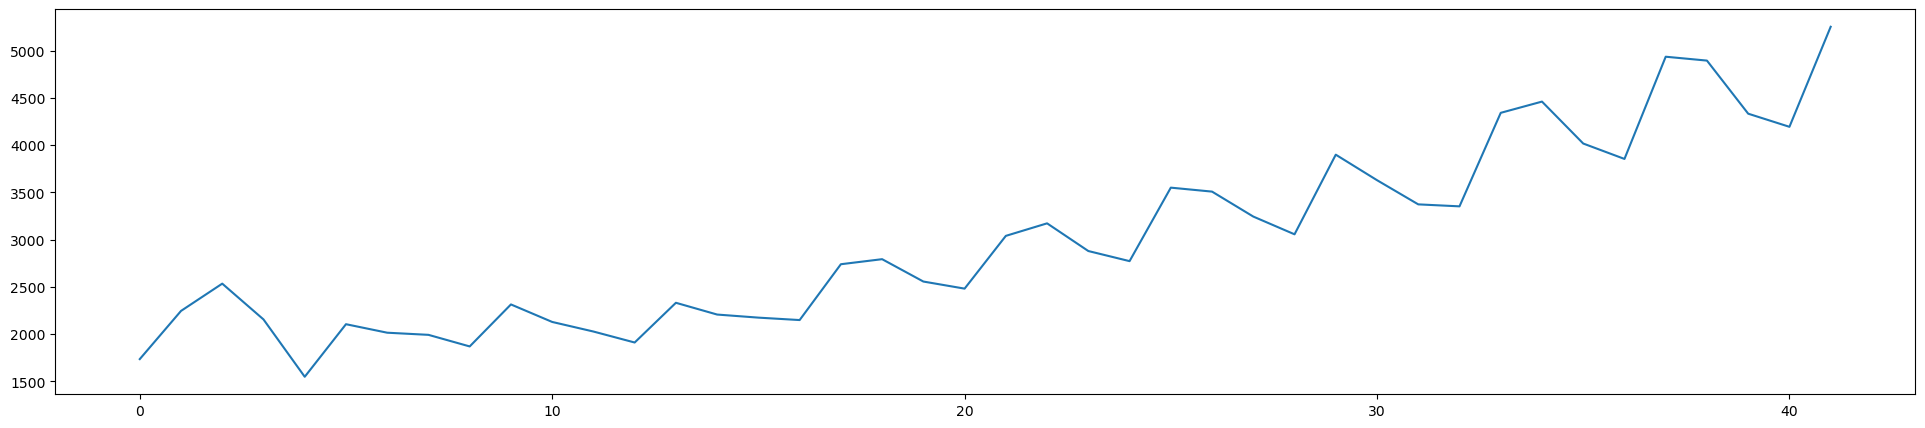

In [ ]:
#Visualization
plt.figure(figsize=(24,5))
coca.Sales.plot()

it has high variation.

<Axes: ylabel='Quarter'>

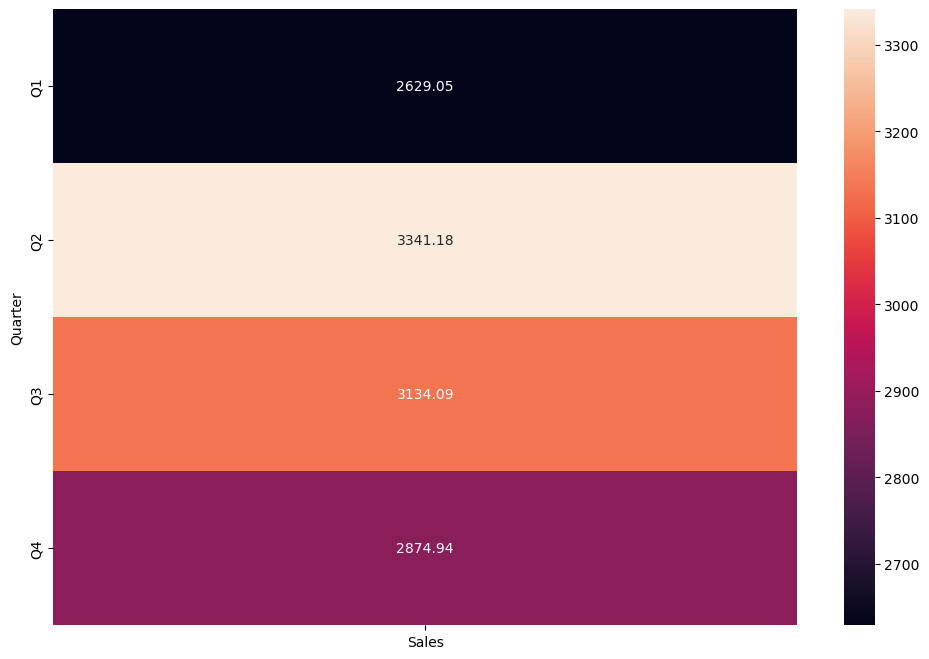

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=coca,values="Sales",index="Quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='Quarter', ylabel='Sales'>

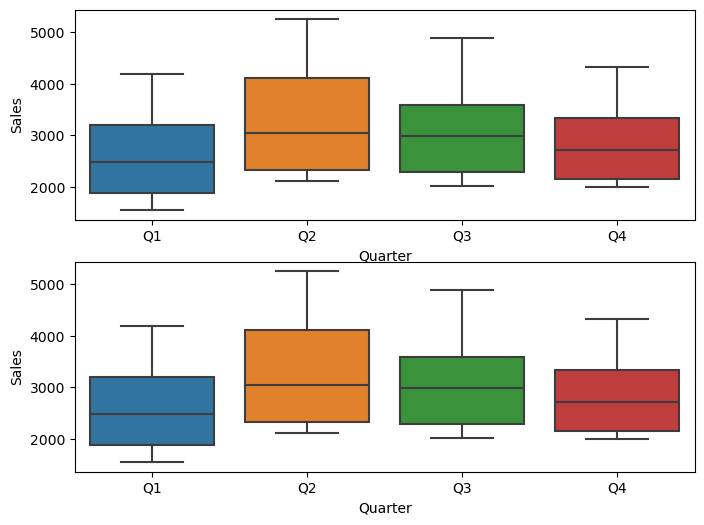

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarter",y="Sales",data=coca)
plt.subplot(212)
sns.boxplot(x="Quarter",y="Sales",data=coca)

<Axes: >

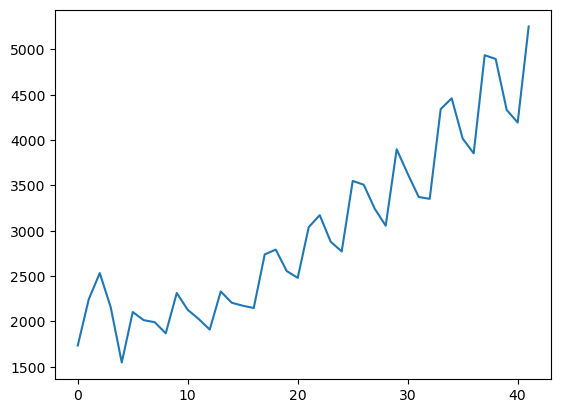

In [ ]:
#Preprocessing
quarter=['Q1','Q2','Q3','Q4']
n=coca['Quarter'][0]
n[0:2]

coca['quarter']=0
for i in range(42):
    n=coca['Quarter'][i]
    coca['Quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coca['quarter']))
    coco=pd.concat((coca,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales
coca.rename(columns={"Sales ": 'Sales'}, inplace=True)
coca.Sales.plot()

The has high variation.

In [ ]:
#Splitting Data
Train = coco.head(34)
Test = coco.iloc[34:38,:]
predict_data = coco.tail(4)
coca2= coco.iloc[0:38,:]

In [ ]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


In [ ]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
34,Q3_94,4461.0,Q3,False,False,True,False,35,1225,8.403128
35,Q4_94,4017.0,Q4,False,False,False,True,36,1296,8.298291
36,Q1_95,3854.0,Q1,True,False,False,False,37,1369,8.256867
37,Q2_95,4936.0,Q2,False,True,False,False,38,1444,8.504311


In [ ]:
#Build Model & Calculate RMSE Values
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


669.4685590402645

In [ ]:

#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862516

In [ ]:
#Quadratic
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.6747277541495

In [ ]:
#Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.738964636288

In [ ]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.88610047129146

In [ ]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202256

In [ ]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

404.5642262159836

In [ ]:

#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


In [ ]:
#Predict the New Model
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,False,True,False,False,42,1764,8.566555


In [ ]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coca2).fit()
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64

In [1]:
import warnings
warnings.filterwarnings("ignore")

# end